In [4]:
from sampler import samplefromGaussian as sfG
import numpy as np
import matplotlib.pyplot as plt

100%|████████████████████████████████| 999999/999999 [00:11<00:00, 86148.38it/s]


Text(0, 0.5, '$p(x)$')

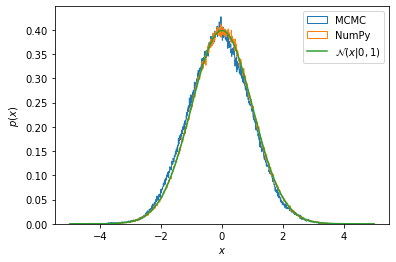

In [27]:

Gauss= lambda x: (1/(np.sqrt(2*np.pi))*np.exp(-1/2*(x)**2))

maxstep=0.1
initialpoint=-0.5
numsteps=1000000

output=sfG(Gauss, maxstep, initialpoint, numsteps)

output2 = np.random.normal(size=numsteps)

plt.hist(output, histtype = 'step', density = True, bins = int(np.sqrt(len(output))), label = 'MCMC')
plt.hist(output2, histtype = 'step', density = True, bins = int(np.sqrt(len(output2))), label = 'NumPy')
x = np.linspace(-5,5,1000)
plt.plot(x, Gauss(x), label = '$\\mathcal{N}(x|0,1)$')
plt.legend(loc = 0)
plt.xlabel('$x$')
plt.ylabel('$p(x)$')

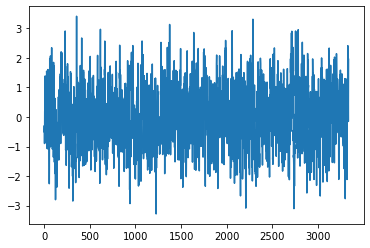

In [16]:
plt.plot(output[::300])

100%|███████████████████████████████████████| 300/300 [00:00<00:00, 4189.82it/s]


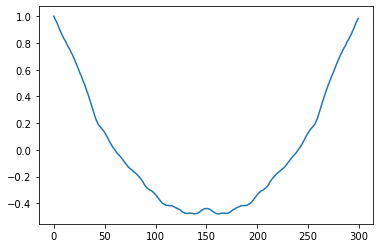

In [30]:
from tqdm import tqdm
def ACF(s):
    taus = np.arange(len(s))
    mean = np.mean(s)
    C    = np.zeros(len(taus))
    for i,t in tqdm(enumerate(taus), total = len(taus)):
        C[i] = np.mean([(s[j]-mean)*(s[(j+t)%len(s)]-mean) for j in range(len(s))]) # List comprehension
    C /= C[0]
    return C

acf = ACF(output[:300])
plt.plot(acf)

Text(0, 0.5, '$p(x)$')

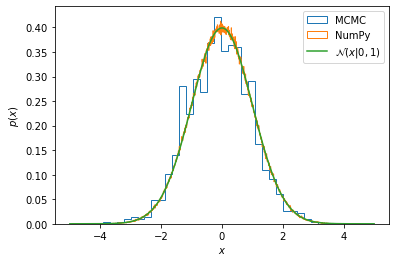

In [29]:
plt.hist(output[::1000], histtype = 'step', density = True, bins = int(np.sqrt(len(output[::1000]))), label = 'MCMC')
plt.hist(output2, histtype = 'step', density = True, bins = int(np.sqrt(len(output2))), label = 'NumPy')
x = np.linspace(-5,5,1000)
plt.plot(x, Gauss(x), label = '$\\mathcal{N}(x|0,1)$')
plt.legend(loc = 0)
plt.xlabel('$x$')
plt.ylabel('$p(x)$')